In [1]:
# Code Block 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

print("Libraries imported and plot style set.")

Libraries imported and plot style set.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style [cite: 211]
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the dataset
# Updated file_path based on your output:
file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/ML-EdgeIIoT-dataset.csv'

try:
    df = pd.read_csv(file_path)
    # Display the first 5 rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display the shape of the dataset
    print(f"\nDataset dimensions (rows, columns): {df.shape}")

except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the file path.")
    # Exit or handle the error appropriately
    # exit() # You might want to comment this out in a notebook
except Exception as e:
    print(f"An error occurred: {e}")

<ipython-input-2-2ce6ee85919b>:6: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First 5 rows of the dataset:
  frame.time    ip.src_host ip.dst_host arp.dst.proto_ipv4  arp.opcode  \
0        6.0  192.168.0.152         0.0                0.0         0.0   
1        6.0  192.168.0.101         0.0                0.0         0.0   
2        6.0  192.168.0.152         0.0                0.0         0.0   
3        6.0  192.168.0.101         0.0                0.0         0.0   
4        6.0  192.168.0.152         0.0                0.0         0.0   

   arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0          0.0                0.0            0.0          0.0   
1          0.0                0.0            0.0          0.0   
2          0.0                0.0            0.0          0.0   
3          0.0                0.0            0.0          0.0   
4          0.0                0.0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mqtt.protoname  mqtt.topic  \
0                      0.0  ...             0.0          

In [3]:
# Display concise summary of the DataFrame
print("\nDataFrame Info (Initial):")
# Using df.info() might produce very long output if verbose=True
# You can start with verbose=False or limit the display if needed.
try:
    df.info(verbose=True, show_counts=True)
except NameError:
     print("DataFrame 'df' not loaded. Please ensure Step 2 ran correctly.")


DataFrame Info (Initial):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  ht

In [4]:
# Identify object columns (excluding the known categorical target 'Attack_type')
try:
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    if 'Attack_type' in object_columns:
        object_columns.remove('Attack_type') # Exclude target variable

    print(f"\nIdentified {len(object_columns)} object columns for potential conversion:")
    print(object_columns)

    # Convert identified columns to numeric, coercing errors
    print("\nConverting object columns to numeric...")
    if object_columns: # Check if list is not empty
         for col in object_columns:
               df[col] = pd.to_numeric(df[col], errors='coerce')
               print(f"Attempted conversion for column: {col}")
    print("Conversion process complete.")

except NameError:
     print("DataFrame 'df' not loaded. Please ensure Step 2 ran correctly.")
except Exception as e:
    print(f"An error occurred during conversion: {e}")


Identified 19 object columns for potential conversion:
['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic']

Converting object columns to numeric...
Attempted conversion for column: frame.time
Attempted conversion for column: ip.src_host
Attempted conversion for column: ip.dst_host
Attempted conversion for column: arp.dst.proto_ipv4
Attempted conversion for column: arp.src.proto_ipv4
Attempted conversion for column: http.file_data
Attempted conversion for column: http.request.uri.query
Attempted conversion for column: http.request.method
Attempted conversion for column: http.referer
Attempted conversion for column: http.request.full_uri
Attempted conversion for column: http.request.version
At

In [5]:
# Check for NaNs introduced by coercion
try:
    if 'object_columns' in locals() and object_columns: # Check if object_columns exists and is not empty
        print("\nChecking for NaN values after coercion:")
        nan_counts = df[object_columns].isnull().sum()
        print(nan_counts[nan_counts > 0]) # Only print columns that have NaNs

        # Impute NaN values using the mean of each column
        print("\nImputing NaN values with column mean...")
        for col in object_columns:
            if df[col].isnull().any(): # Check if imputation is needed
                mean_val = df[col].mean()
                df[col].fillna(mean_val, inplace=True)
                print(f"Imputed NaNs in column: {col} with mean {mean_val:.4f}")
        print("Imputation complete.")
    else:
        print("\nNo object columns were identified for conversion/imputation in the previous step.")

except NameError:
     print("DataFrame 'df' or 'object_columns' not defined. Please ensure previous steps ran correctly.")
except Exception as e:
    print(f"An error occurred during imputation: {e}")


Checking for NaN values after coercion:
frame.time                156586
ip.src_host               149809
ip.dst_host               136372
arp.dst.proto_ipv4          2976
arp.src.proto_ipv4          1574
http.file_data              9471
http.request.uri.query      2751
http.request.method         7196
http.referer                 290
http.request.full_uri       7174
http.request.version        7196
tcp.options                79280
tcp.payload                34608
tcp.srcport                  367
dns.qry.name.len              29
mqtt.conack.flags           1289
mqtt.msg                    1246
mqtt.protoname              1250
mqtt.topic                  1246
dtype: int64

Imputing NaN values with column mean...
Imputed NaNs in column: frame.time with mean 1.6853
Imputed NaNs in column: ip.src_host with mean 0.0000
Imputed NaNs in column: ip.dst_host with mean 0.0000
Imputed NaNs in column: arp.dst.proto_ipv4 with mean 0.0000
Imputed NaNs in column: arp.src.proto_ipv4 with mean 0.0000


<ipython-input-5-ee78f892085a>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [6]:
# Verify that there are no remaining missing values
try:
    total_nans = df.isnull().sum().sum()
    if total_nans == 0:
        print("\nVerification successful: No missing values remain in the DataFrame.")
    else:
        print(f"\nVerification failed: {total_nans} missing values still present.")
        print(df.isnull().sum()[df.isnull().sum() > 0]) # Show columns with NaNs

    # Display DataFrame info again to confirm dtypes and non-null counts
    print("\nDataFrame Info after cleaning:")
    df.info(verbose=True, show_counts=True)

except NameError:
     print("DataFrame 'df' not loaded. Please ensure previous steps ran correctly.")
except Exception as e:
    print(f"An error occurred during verification: {e}")


Verification successful: No missing values remain in the DataFrame.

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  float64
 1   ip.src_host                157800 non-null  float64
 2   ip.dst_host                157800 non-null  float64
 3   arp.dst.proto_ipv4         157800 non-null  float64
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  float64
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null

In [7]:
# Define target column names
target_cols = ['Attack_label', 'Attack_type']

try:
    # Create feature matrix X by dropping target columns
    X = df.drop(columns=target_cols)

    # Create target variables y
    y_label = df['Attack_label'] # Binary target
    y_type = df['Attack_type'] # Multi-class target

    # Verify the shape of X
    print(f"\nFeature matrix X dimensions: {X.shape}")

    # Confirm all columns in X are numeric
    print("\nData types of columns in X:")
    X.info(verbose=False) # A concise info is usually enough here

    # Display first few values and distributions of the targets
    print("\nFirst 5 values of Attack_label:")
    print(y_label.head())
    print("\nFirst 5 values of Attack_type:")
    print(y_type.head())
    print("\nDistribution of Attack_label:")
    print(y_label.value_counts())
    print("\nDistribution of Attack_type:")
    print(y_type.value_counts())

except NameError:
     print("DataFrame 'df' not loaded. Please ensure Step 2 ran correctly.")
except KeyError as e:
    print(f"Error: Column {e} not found. Check target_cols definition and CSV file.")
except Exception as e:
    print(f"An error occurred during feature/target separation: {e}")


Feature matrix X dimensions: (157800, 61)

Data types of columns in X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Columns: 61 entries, frame.time to mbtcp.unit_id
dtypes: float64(61)
memory usage: 73.4 MB

First 5 values of Attack_label:
0    1
1    1
2    1
3    1
4    1
Name: Attack_label, dtype: int64

First 5 values of Attack_type:
0    MITM
1    MITM
2    MITM
3    MITM
4    MITM
Name: Attack_type, dtype: object

Distribution of Attack_label:
Attack_label
1    133499
0     24301
Name: count, dtype: int64

Distribution of Attack_type:
Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM

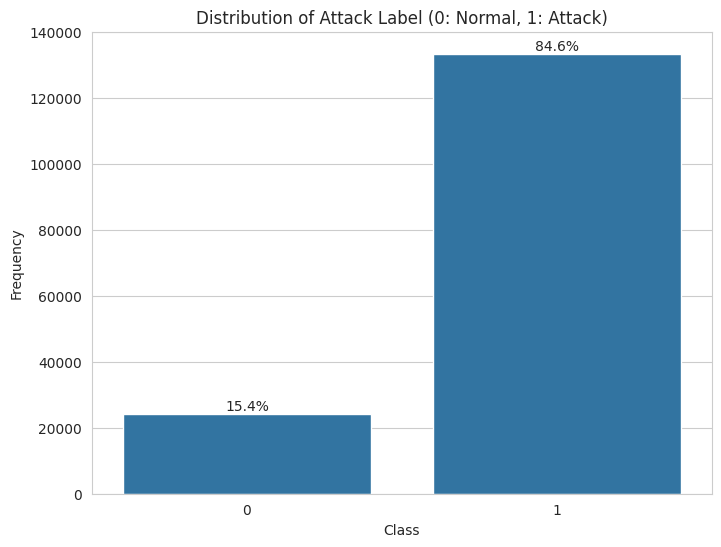

In [10]:
# Visualize the distribution of Attack_label
try:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=y_label)
    plt.title('Distribution of Attack Label (0: Normal, 1: Attack)')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    # Add percentage annotations
    total = len(y_label)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

except NameError:
     print("Target variable 'y_label' not defined. Please ensure Step 7 ran correctly.")
except Exception as e:
    print(f"An error occurred plotting Attack_label distribution: {e}")

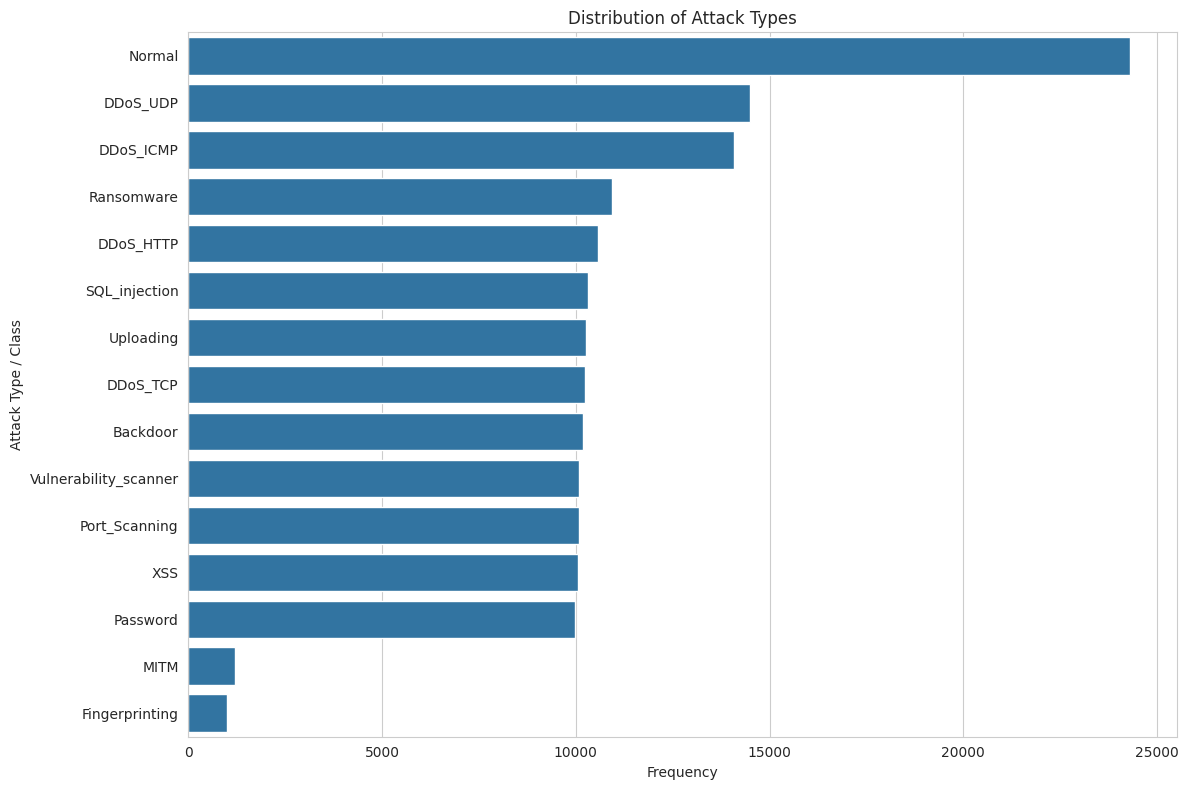


Detailed Distribution of Attack_type:
Attack_type
Normal                   15.399873
DDoS_UDP                  9.187579
DDoS_ICMP                 8.929024
Ransomware                6.923321
DDoS_HTTP                 6.692649
SQL_injection             6.534221
Uploading                 6.507605
DDoS_TCP                  6.493663
Backdoor                  6.460710
Vulnerability_scanner     6.385298
Port_Scanning             6.382129
XSS                       6.370089
Password                  6.330165
MITM                      0.769328
Fingerprinting            0.634347
Name: proportion, dtype: float64


In [11]:
# Visualize the distribution of Attack_type
try:
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(y=y_type, order=y_type.value_counts().index)  # Horizontal plot for readability
    plt.title('Distribution of Attack Types')
    plt.xlabel('Frequency')
    plt.ylabel('Attack Type / Class')

    # Optional: Add count annotations (can be cluttered if many classes)
    # for p in ax.patches:
    #     ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
    #                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Also print value counts for precise numbers
    print("\nDetailed Distribution of Attack_type:")
    print(y_type.value_counts(normalize=True) * 100)  # Show percentages

except NameError:
    print("Target variable 'y_type' not defined. Please ensure Step 7 ran correctly.")
except Exception as e:
    print(f"An error occurred plotting Attack_type distribution: {e}")

Analyzing distributions for features: ['tcp.flags', 'udp.time_delta', 'http.content_length', 'tcp.len', 'icmp.checksum', 'mqtt.len']


<ipython-input-17-502a1e9152e0>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x=feature, hue='Attack_label', fill=True,
<ipython-input-17-502a1e9152e0>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x=feature, hue='Attack_label', fill=True,
<ipython-input-17-502a1e9152e0>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=plot_df, x=feature, hue='Attack_label', fill=True,


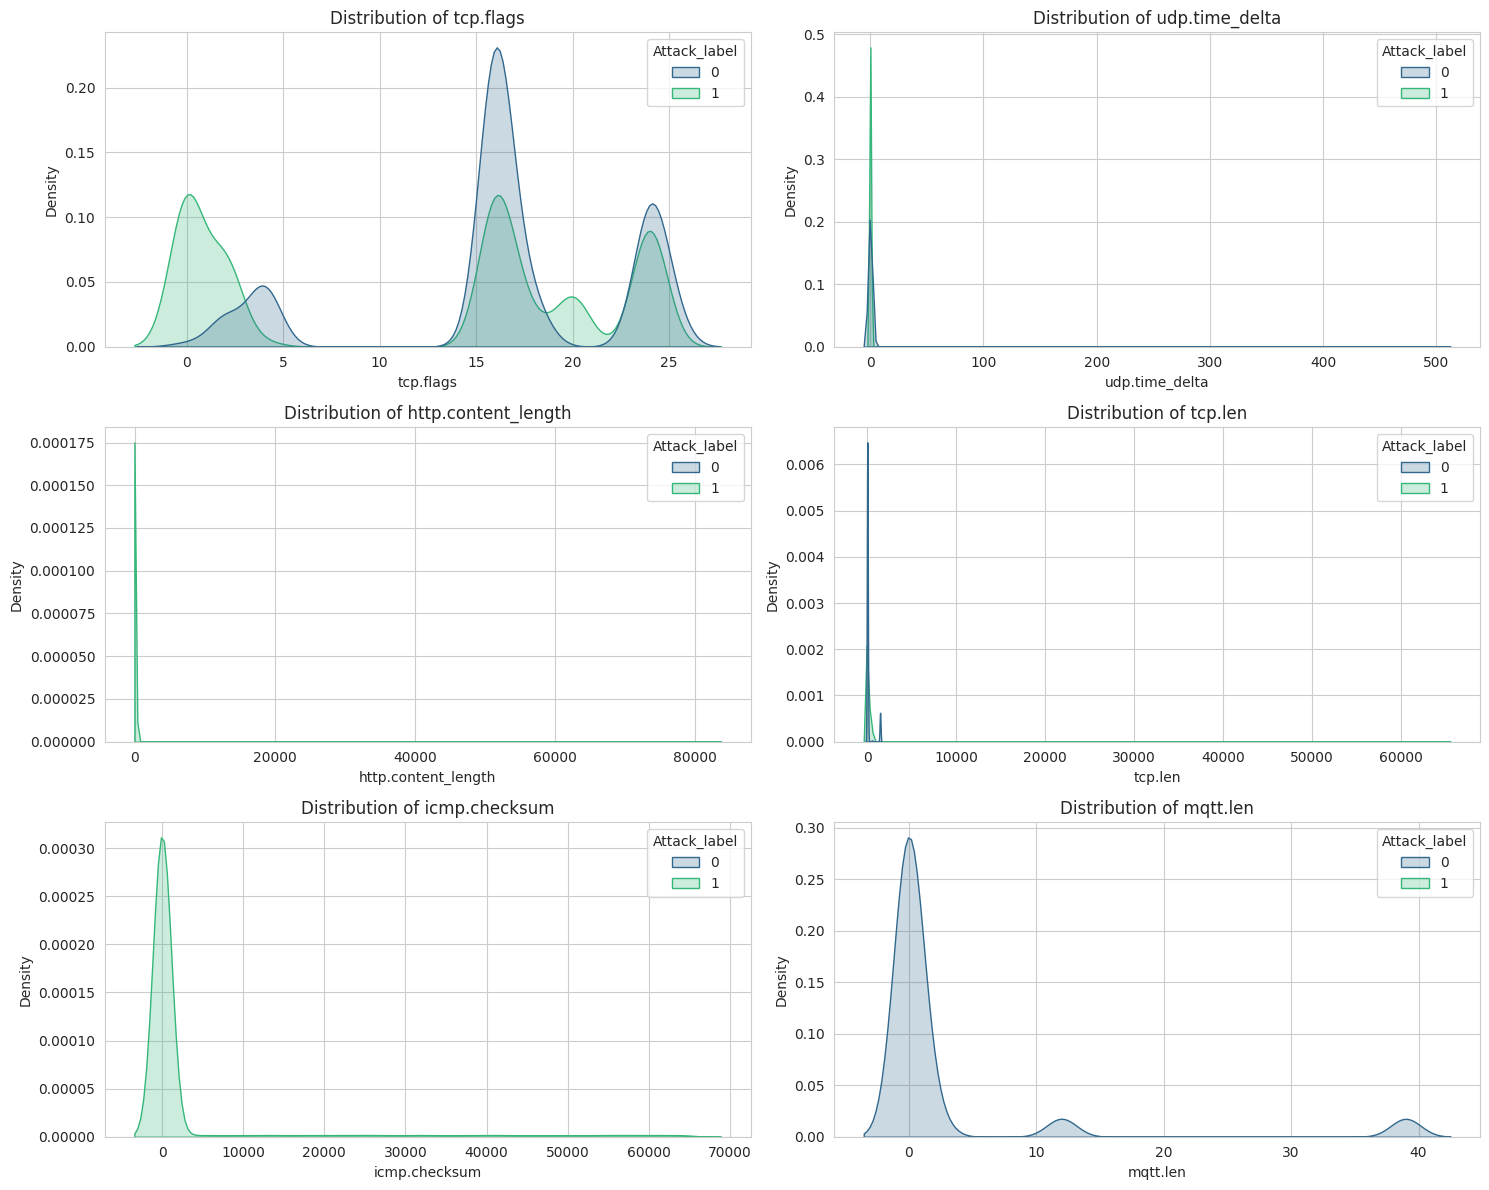

In [17]:
# Select features that exist in your dataset
selected_features = [
    'tcp.flags',          # TCP control flags
    'udp.time_delta',     # Time between UDP packets (alternative to tcp.time_delta)
    'http.content_length', # HTTP payload size
    'tcp.len',            # TCP segment length
    'icmp.checksum',      # ICMP checksum (alternative to icmp.type)
    'mqtt.len'            # MQTT message length (alternative to mqtt.msg_len)
]

print(f"Analyzing distributions for features: {selected_features}")

# Create subplots
n_features = len(selected_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Temporary DataFrame for plotting
plot_df = pd.concat([X[selected_features], y_label], axis=1)

for i, feature in enumerate(selected_features):
    ax = axes[i]
    sns.kdeplot(data=plot_df, x=feature, hue='Attack_label', fill=True,
                common_norm=False, palette='viridis', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)

    # Apply log scale if data is highly skewed
    if plot_df[feature].skew() > 1 or plot_df[feature].skew() < -1:
        if plot_df[feature].min() > 0:  # Only apply log to positive values
            ax.set_xscale('log')
            ax.set_title(f'Distribution of {feature} (Log Scale)')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import RobustScaler

# Scale skewed features
scaler = RobustScaler()
to_scale = ['http.content_length', 'tcp.len', 'udp.time_delta']
X[to_scale] = scaler.fit_transform(X[to_scale])

In [20]:
from sklearn.model_selection import train_test_split

# Split data (stratify due to imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_label, test_size=0.3, stratify=y_label, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [27]:
# Calculate the Pearson correlation matrix for features in X
print("\nCalculating feature correlation matrix...")
correlation_matrix = X.corr(method='pearson')
print("Correlation matrix calculation complete.")
print(f"Correlation matrix shape: {correlation_matrix.shape}")


Calculating feature correlation matrix...
Correlation matrix calculation complete.
Correlation matrix shape: (61, 61)


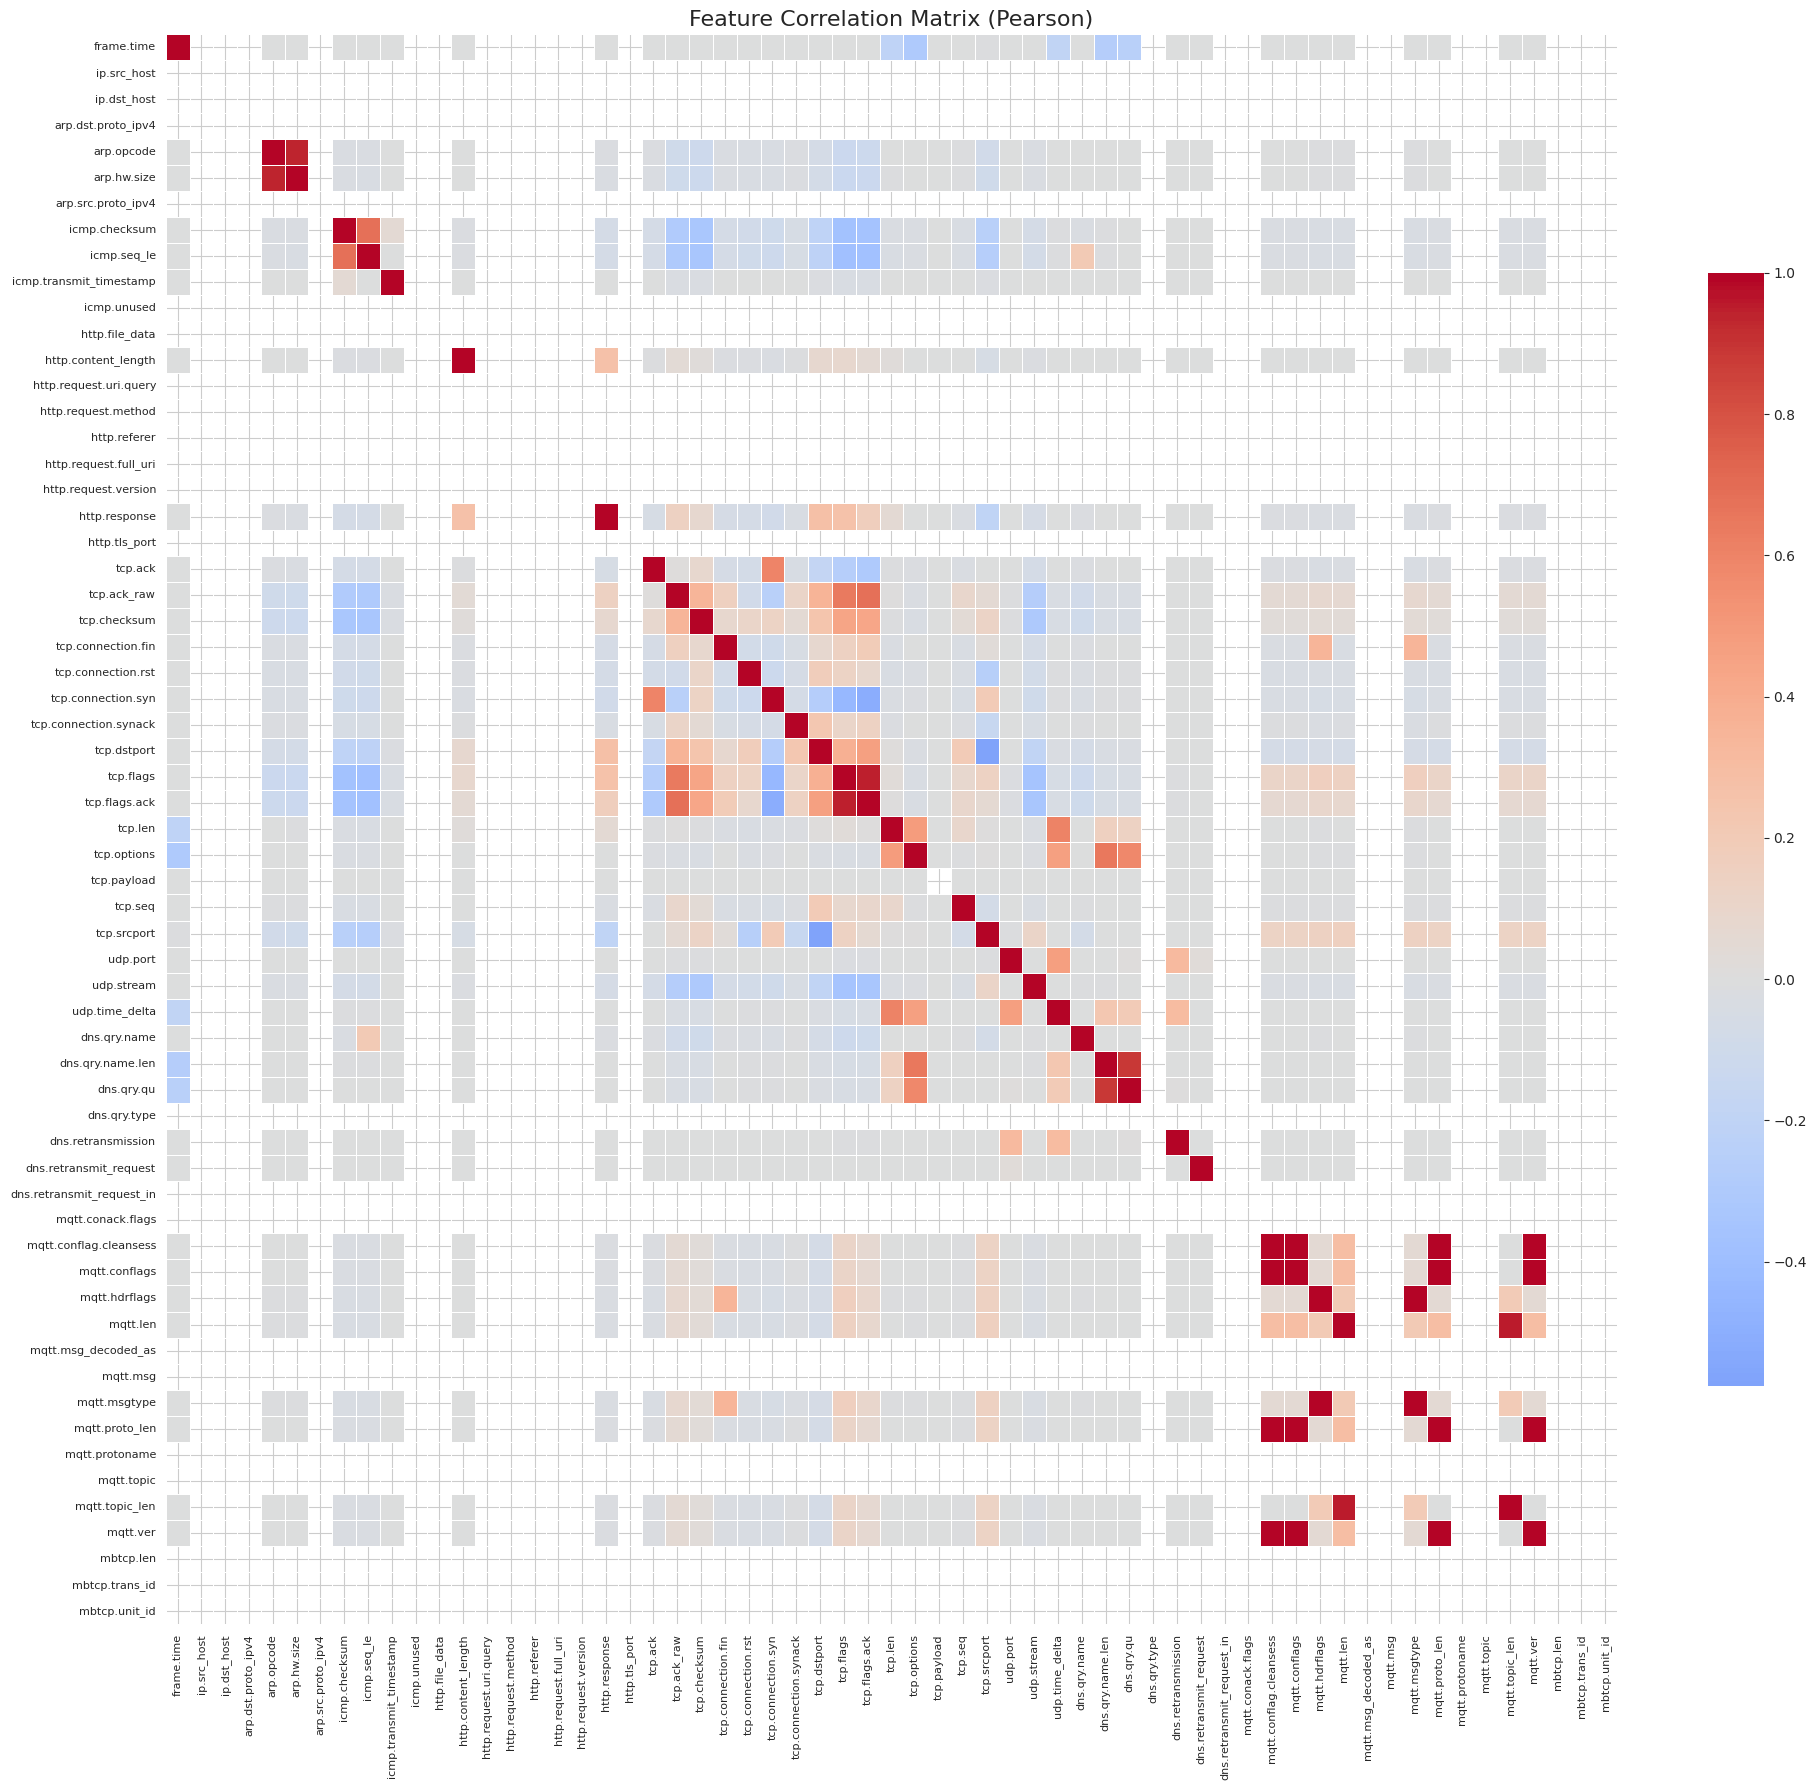

In [28]:
plt.figure(figsize=(20, 18)) # Adjust size as needed for 61 features
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f",
linewidths=.5, cbar_kws={"shrink":.7}) # annot=False for large matrices
plt.title('Feature Correlation Matrix (Pearson)', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [30]:
# Find and display highly correlated feature pairs (|correlation| > threshold)
threshold = 0.9

# Initialize list to store correlated pairs
highly_correlated_pairs = []

# Get correlation matrix (ensure it's calculated first)
correlation_matrix = X.corr()

# Iterate through upper triangle of correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Only need to check lower triangle
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Correlation': corr_value
            })

# Display results
if highly_correlated_pairs:
    highly_correlated_df = pd.DataFrame(highly_correlated_pairs)
    highly_correlated_df = highly_correlated_df.sort_values(
        by='Correlation',
        key=abs,
        ascending=False
    )
    print(f"\nFeature pairs with absolute correlation > {threshold}:")
    print(highly_correlated_df.to_string())
else:
    print(f"\nNo feature pairs found with absolute correlation > {threshold}.")


Feature pairs with absolute correlation > 0.9:
        Feature 1               Feature 2  Correlation
3    mqtt.msgtype           mqtt.hdrflags     1.000000
2   mqtt.conflags  mqtt.conflag.cleansess     1.000000
7        mqtt.ver  mqtt.conflag.cleansess     1.000000
8        mqtt.ver           mqtt.conflags     1.000000
4  mqtt.proto_len  mqtt.conflag.cleansess     1.000000
5  mqtt.proto_len           mqtt.conflags     1.000000
9        mqtt.ver          mqtt.proto_len     1.000000
6  mqtt.topic_len                mqtt.len     0.954335
1   tcp.flags.ack               tcp.flags     0.949096
0     arp.hw.size              arp.opcode     0.944180


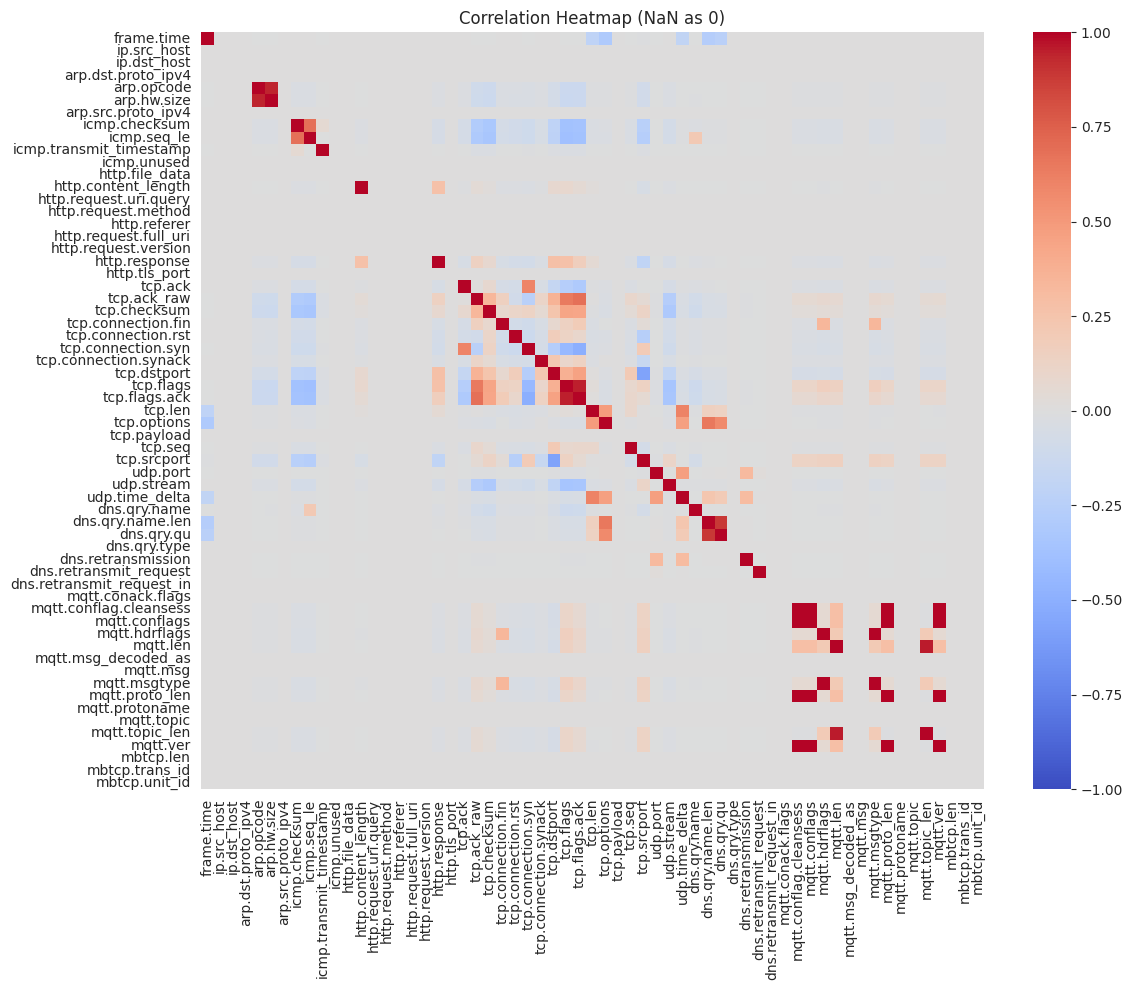

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix.fillna(0),
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            xticklabels=True,
            yticklabels=True)
plt.title("Correlation Heatmap (NaN as 0)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Calculating correlation between features and Attack_label...


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top 10 features correlated with Attack_label:
mqtt.hdrflags            -0.2923
mqtt.msgtype             -0.2923
mqtt.len                 -0.2725
tcp.seq                  -0.2694
tcp.dstport              -0.2427
mqtt.conflags            -0.2094
mqtt.ver                 -0.2094
mqtt.conflag.cleansess   -0.2094
mqtt.proto_len           -0.2094
mqtt.topic_len           -0.2091


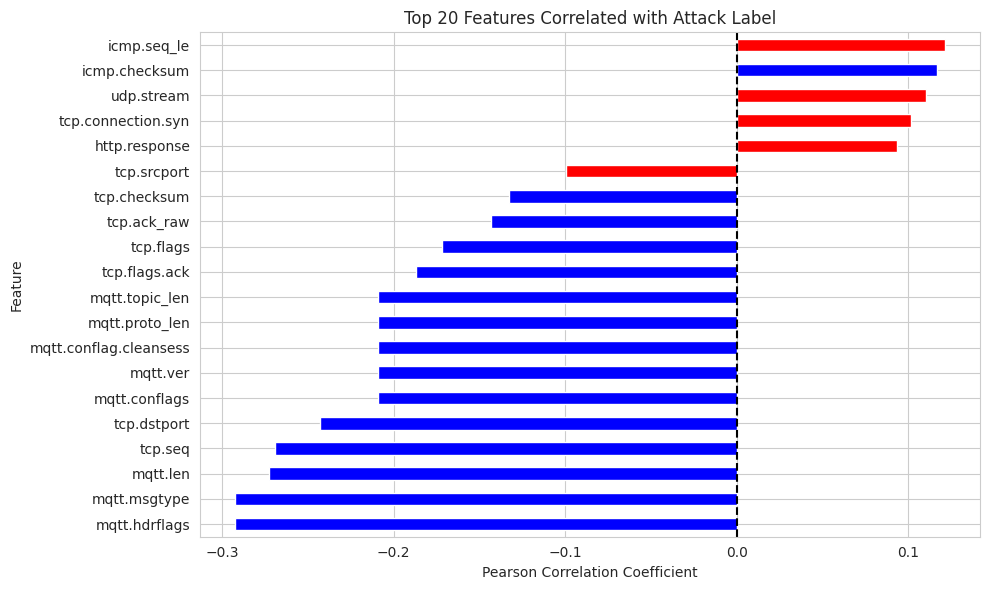

In [36]:
# Calculate correlation between features and binary target
print("\nCalculating correlation between features and Attack_label...")

# Handle potential non-numeric columns
numeric_X = X.select_dtypes(include=['number'])

# Compute correlations
feature_target_corr = numeric_X.corrwith(y_label, method='pearson')

# Process and display results
if feature_target_corr.isna().all():
    print("Warning: All correlations are NaN - check data types and variance")
else:
    # Sort by absolute correlation and filter NA
    feature_target_corr_sorted = (feature_target_corr
                                .abs()
                                .sort_values(ascending=False)
                                .dropna())

    print("\nTop 10 features correlated with Attack_label:")
    print(feature_target_corr.loc[feature_target_corr_sorted.index[:10]]
          .to_string(float_format="%.4f"))

    # Visualization (fixed indentation)
    plt.figure(figsize=(10, 6))
    (feature_target_corr.loc[feature_target_corr_sorted.index[:20]]
     .sort_values()
     .plot.barh(color=np.where(feature_target_corr.loc[feature_target_corr_sorted.index[:20]] > 0,
               'red', 'blue')))
    plt.title('Top 20 Features Correlated with Attack Label')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('Feature')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()


Robust correlation calculation with Attack_label:


<ipython-input-38-177d33b0d3a0>:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(numeric_X[col].fillna(0), y_label)



Top 10 features correlated with Attack_label:
mqtt.topic_len           -0.209100
mqtt.conflags            -0.209438
mqtt.proto_len           -0.209438
mqtt.conflag.cleansess   -0.209438
mqtt.ver                 -0.209438
tcp.dstport              -0.242699
tcp.seq                  -0.269419
mqtt.len                 -0.272520
mqtt.msgtype             -0.292345
mqtt.hdrflags            -0.292345
dtype: float64


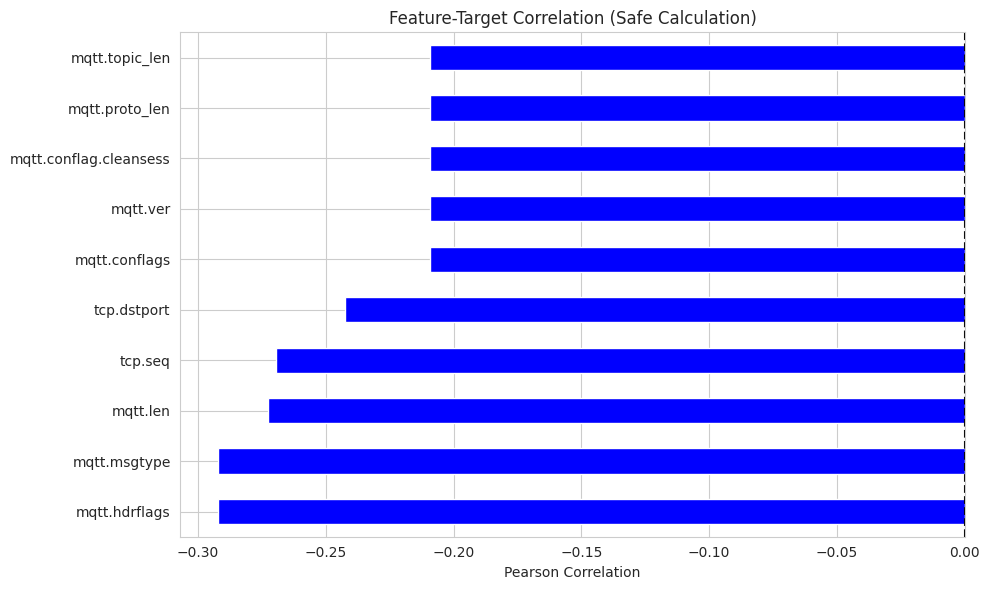

In [38]:
from scipy.stats import pearsonr

print("\nRobust correlation calculation with Attack_label:")

# Preprocessing
numeric_X = X.select_dtypes(include=['number'])
valid_features = []

# Calculate correlations safely
correlations = {}
for col in numeric_X.columns:
    try:
        corr, _ = pearsonr(numeric_X[col].fillna(0), y_label)
        correlations[col] = corr
    except:
        continue

# Convert to Series and process
feature_target_corr = pd.Series(correlations)
valid_corr = feature_target_corr.dropna()

if len(valid_corr) == 0:
    print("No valid correlations calculated - check data quality")
else:
    # Get top correlations (absolute value)
    top_corr = (valid_corr.abs()
                 .sort_values(ascending=False)
                 .index[:10])

    print("\nTop 10 features correlated with Attack_label:")
    print(valid_corr[top_corr].sort_values(ascending=False))

    # Visualization
    plt.figure(figsize=(10,6))
    valid_corr[top_corr].sort_values().plot.barh(
        color=np.where(valid_corr[top_corr] > 0, 'red', 'blue'))
    plt.title('Feature-Target Correlation (Safe Calculation)')
    plt.xlabel('Pearson Correlation')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

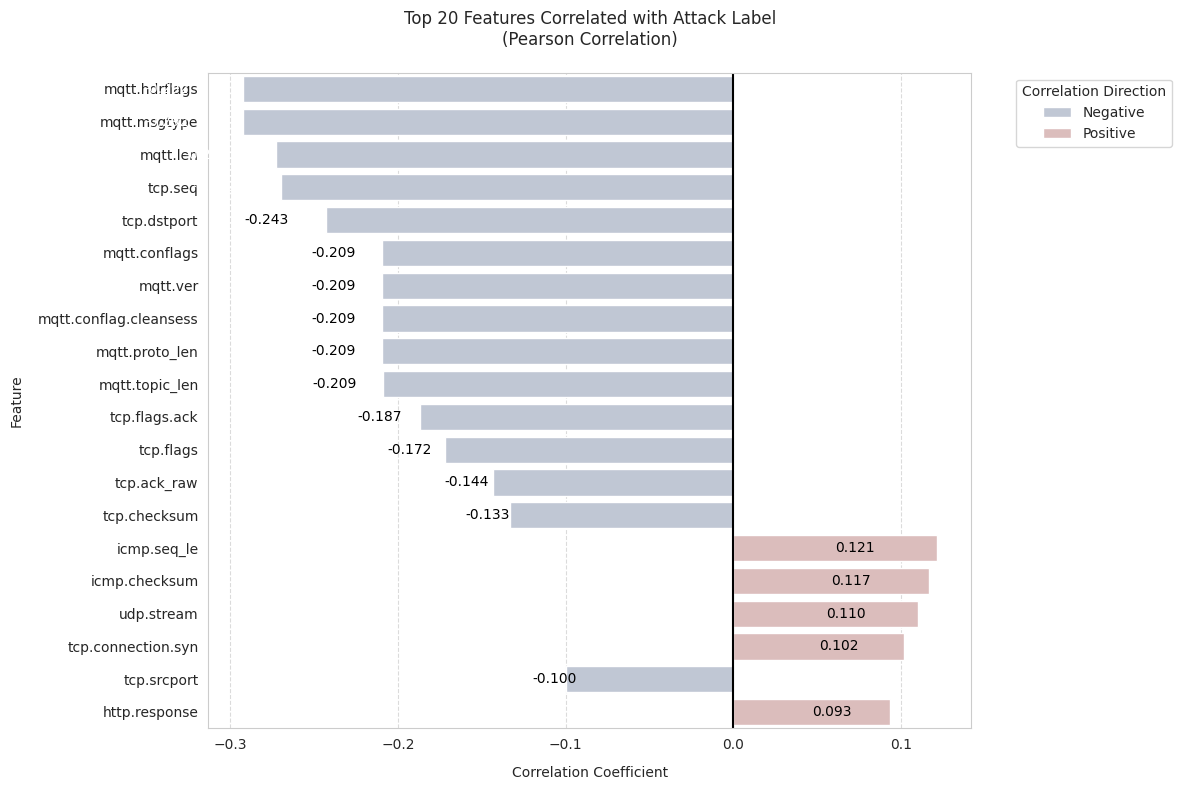


Correlation Statistics for Top 20 Features:
Strongest Positive: 0.121 (icmp.seq_le)
Strongest Negative: -0.292 (mqtt.hdrflags)
Average Absolute: 0.185


In [39]:
# Select top N features based on absolute correlation
top_n = 20
top_corr_features = feature_target_corr.abs().sort_values(ascending=False)[:top_n].index
top_correlations = feature_target_corr[top_corr_features]

# Create visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_correlations.values,
                 y=top_correlations.index,
                 palette='vlag',
                 hue=np.where(top_correlations.values > 0, 'Positive', 'Negative'))

# Add annotations
for i, (feature, corr) in enumerate(zip(top_correlations.index, top_correlations.values)):
    ax.text(corr/2 if corr > 0 else corr*1.2,
            i,
            f'{corr:.3f}',
            va='center',
            color='white' if abs(corr) > 0.25 else 'black')

plt.title(f'Top {top_n} Features Correlated with Attack Label\n(Pearson Correlation)', pad=20)
plt.xlabel('Correlation Coefficient', labelpad=10)
plt.ylabel('Feature', labelpad=10)
plt.axvline(0, color='black', linestyle='-')
plt.legend(title='Correlation Direction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print statistical summary
print(f"\nCorrelation Statistics for Top {top_n} Features:")
print(f"Strongest Positive: {top_correlations.max():.3f} ({top_correlations.idxmax()})")
print(f"Strongest Negative: {top_correlations.min():.3f} ({top_correlations.idxmin()})")
print(f"Average Absolute: {top_correlations.abs().mean():.3f}")